test

x:
[[1 2 3]
 [2 3 4]]
array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

sp array=
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
sp2=
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


,name,loc,age
0,h,chn,12
1,n,mad,13


,name,loc,age
0,h,chn,12
1,n,mad,13
2,t,dxb,11


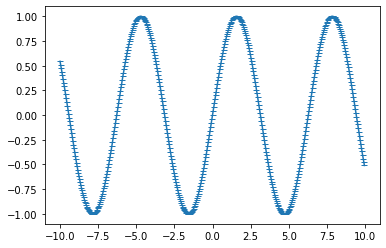

In [0]:
import numpy as np

x=np.array([[1,2,3],[2,3,4]])
print("x:\n{}".format(x))

from scipy import sparse
eye=np.eye(4)
print("array:\n{}".format(eye))

sparse_matrix=sparse.csr_matrix(eye)
print("\nsp array=\n{}".format(sparse_matrix))

data=np.ones(4)
row=np.arange(4)
col=np.arange(4)

sp2=sparse.coo_matrix((data,(row,col)))
print("sp2=\n{}".format(sp2))

import matplotlib.pyplot as plt

x=np.linspace(-10,10,num=500,endpoint=False)
y=np.sin(x)
plt.plot(x,y,marker="_")

import pandas as pd

data={'name':["h","n","t"],'loc':["chn","mad","dxb"],'age':[12,13,11]}
dp=pd.DataFrame(data)
display(dp[dp.age>11])
display(dp)

In [0]:
df = pd.DataFrame({'A': range(1, 6),

                   'B': range(10, 0, -2),

                   'C C': range(10, 5, -1)})
df.query('A>B')

,A,B,C C
4,5,2,6


In [0]:
pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=349f0cb3b20af24fcd40fe2ff42495d6a990b0edacf899caaa4d5c257e625c64
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import sklearn
import scipy as sp
import IPython

loading dataset and exploring

In [0]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()
print("key of dataset= \n{}".format(iris_dataset.keys()))
print(iris_datasets["DESCR"][:200]+"\n...")
print("target names=\n{}".format(iris_dataset['target_names']))
print("feature names=\n{}".format(iris_dataset['feature_names']))
print("type of data= {}".format(type(iris_dataset['data'])))
print("shape of data=\n{}".format(iris_dataset['data'].shape))
print("first five columns=\n{}".format(iris_dataset['data'][:5]))
print("type of target= {}".format(type(iris_dataset['target'])))
print("shape of target=\n{}".format(iris_dataset['target'].shape))
print("target=\n{}".format(iris_dataset['target']))

key of dataset= 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
...
target names=
['setosa' 'versicolor' 'virginica']
feature names=
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
type of data= <class 'numpy.ndarray'>
shape of data=
(150, 4)
first five columns=
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
type of target= <class 'numpy.ndarray'>
shape of target=
(150,)
target=
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

finding shape and splitting

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
print("x train shape=\n{}".format(X_train.shape))
print("y train shape=\n{}".format(y_train.shape))
print("x test shape=\n{}".format(X_test.shape))
print("y test shape=\n{}".format(y_test.shape))

x train shape=
(112, 4)
y train shape=
(112,)
x test shape=
(38, 4)
y test shape=
(38,)


pair plot

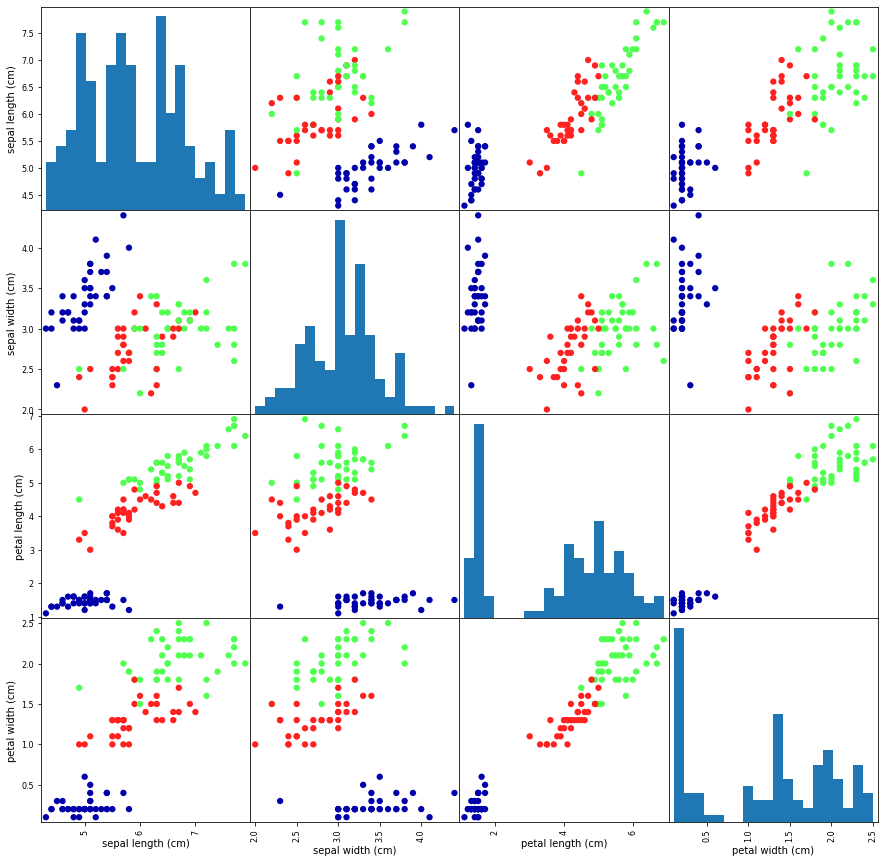

In [0]:
import mglearn
from pandas.plotting import scatter_matrix 
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
grr=scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=40,alpha=1,cmap=mglearn.cm3)

classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

prediction

In [0]:
X_new=np.array([[5,2.9,1,0.2]])
print("x_new shape=\n{}".format(X_new.shape))
prediction=knn.predict(X_new)
print("prediction=\n{}".format(prediction))
print("prediction target name=\n{}".format(iris_dataset['target_names'][prediction]))

x_new shape=
(1, 4)
prediction=
[0]
prediction target name=
['setosa']


evaluating model

In [0]:
y_pred=knn.predict(X_test)
print("test set prediction=\n{}".format(y_pred))
print("test score:{:.2f}".format(np.mean(y_pred==y_test)))
print("test score:{:.2f}".format(knn.score(X_test,y_test)))

test set prediction=
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
test score:0.97
test score:0.97
